In [3]:
# 1. Zaimportować potrzebne biblioteki
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# 2. Wczytać odpowiedni zbiór danych 5pkt
# Definiowanie nazw kolumn na podstawie zawartości pliku `wine.names`
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Wczytywanie danych z pliku `wine.data`, dodając nazwy kolumn (wine.data i wine.names z https://archive.ics.uci.edu/dataset/109/wine)
wine_data = pd.read_csv('/Users/jakubczi/Desktop/programs/wine.data', header=None, names=column_names)

# Wyświetlenie pierwszych kilku wierszy, aby sprawdzić, czy dane zostały poprawnie zaimportowane
print(wine_data.head())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [7]:
# 3. Podać jakie mamy klasy, liczbę próbek w zbiorze i liczbę próbek w każdej klasie 10pkt
# Wypisanie unikalnych klas
unique_classes = wine_data['Class'].unique()
print("Unikalne klasy w zbiorze danych (pierwsza kolumna w CSV):", unique_classes)

# Liczenie liczby próbek w zbiorze
total_samples = wine_data.shape[0]
print("Liczba wszystkich próbek w zbiorze (ilosc rekordow w CSV):", total_samples)

# Liczenie próbek w każdej klasie
samples_per_class = wine_data['Class'].value_counts()
print("Liczba próbek w każdej klasie:\n", samples_per_class)

Unikalne klasy w zbiorze danych (pierwsza kolumna w CSV): [1 2 3]
Liczba wszystkich próbek w zbiorze (ilosc rekordow w CSV): 178
Liczba próbek w każdej klasie:
 Class
2    71
1    59
3    48
Name: count, dtype: int64


In [8]:
# 4. Sprawdzić czy występują brakujące wartości w zmiennych 5pkt
# Sprawdzenie, czy w danych występują brakujące wartości
missing_values = wine_data.isnull().sum()

# Wyświetlenie liczby brakujących wartości dla każdej kolumny
print("Liczba brakujących wartości dla każdej kolumny:\n", missing_values)

# Dodatkowo, aby sprawdzić, czy w ogóle występują jakiekolwiek brakujące wartości w DataFrame
if missing_values.sum() > 0:
    print("W zbiorze danych występują brakujące wartości.")
else:
    print("W zbiorze danych nie występują brakujące wartości.")

# komentarz: kazda kolumna i wiersz w csv posiada wartosc

Liczba brakujących wartości dla każdej kolumny:
 Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64
W zbiorze danych nie występują brakujące wartości.


In [9]:
# 5. Zrobić podsumowanie dla trzech wybranych zmiennych numerycznych (średnia, odchylenie, mediana, wart. maks. wart. minimalna, kwartyle) 20 pkt
# Wybranie trzech zmiennych numerycznych
selected_variables = wine_data[['Alcohol', 'Malic acid', 'Ash']]

# Użycie funkcji describe() do uzyskania podsumowania statystycznego
summary = selected_variables.describe()

# Dodanie zakresu (różnicy między maksymalną a minimalną wartością) jako dodatkowej statystyki
summary.loc['range'] = summary.loc['max'] - summary.loc['min']

# Wyświetlenie podsumowania
print(summary)

          Alcohol  Malic acid         Ash
count  178.000000  178.000000  178.000000
mean    13.000618    2.336348    2.366517
std      0.811827    1.117146    0.274344
min     11.030000    0.740000    1.360000
25%     12.362500    1.602500    2.210000
50%     13.050000    1.865000    2.360000
75%     13.677500    3.082500    2.557500
max     14.830000    5.800000    3.230000
range    3.800000    5.060000    1.870000


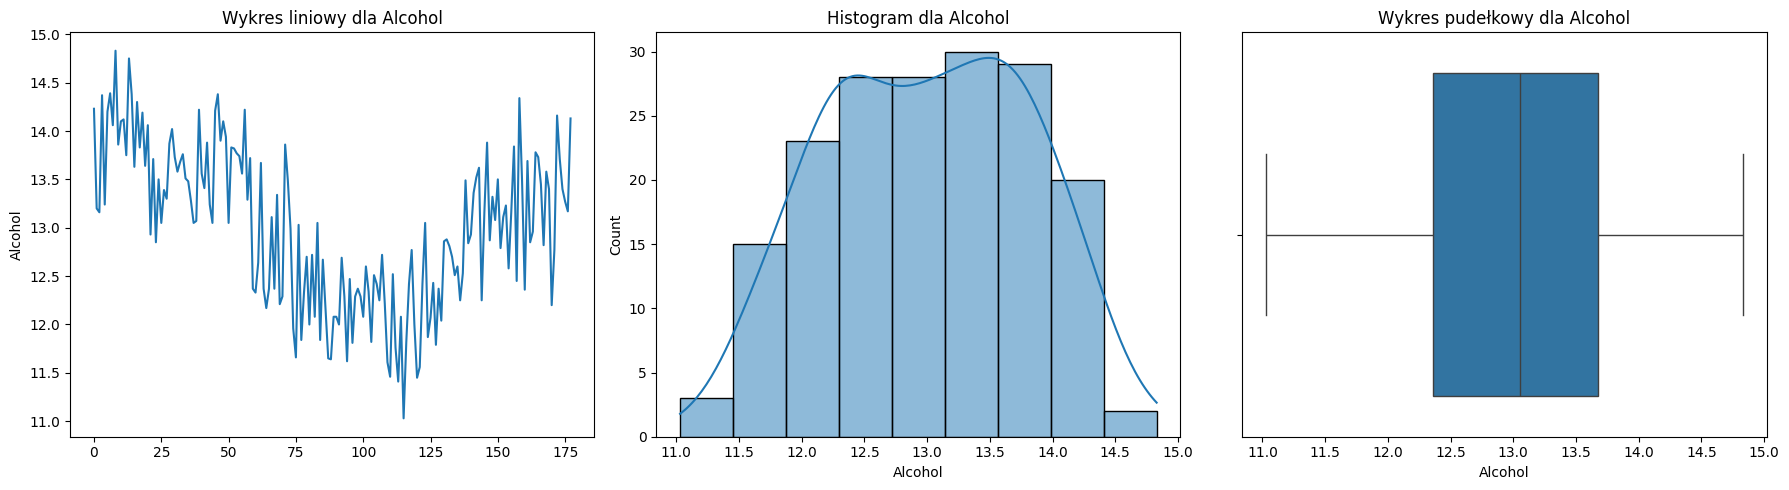

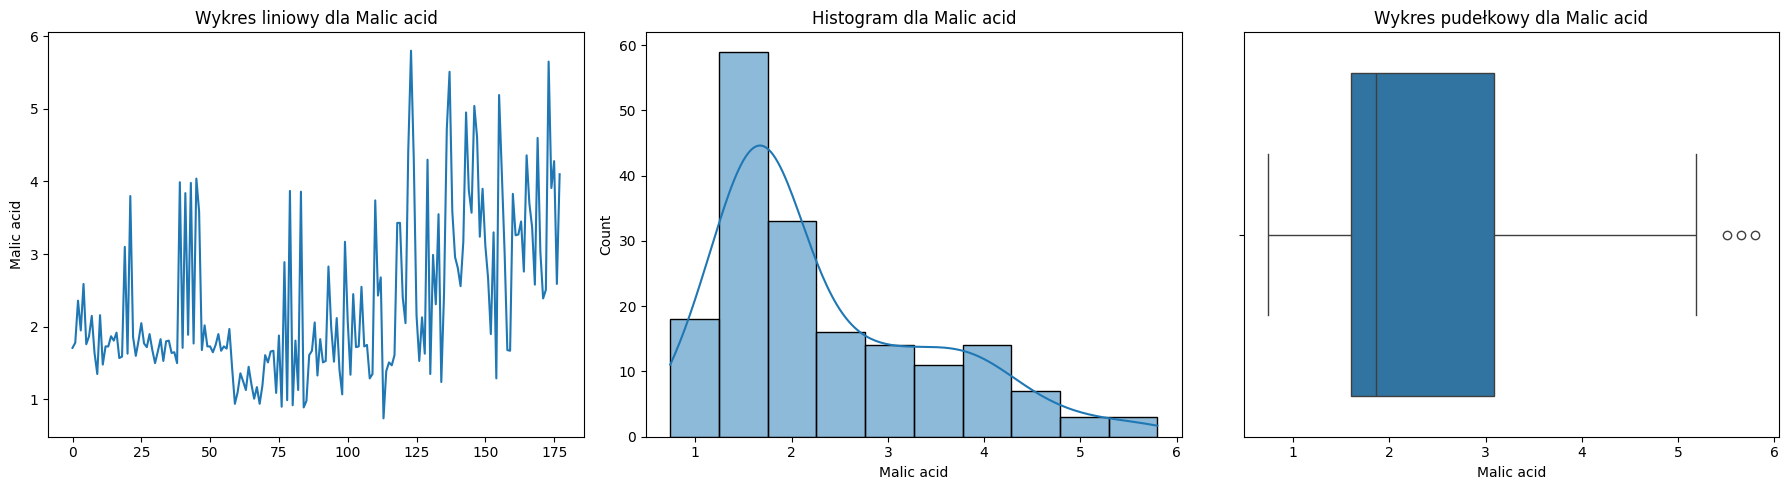

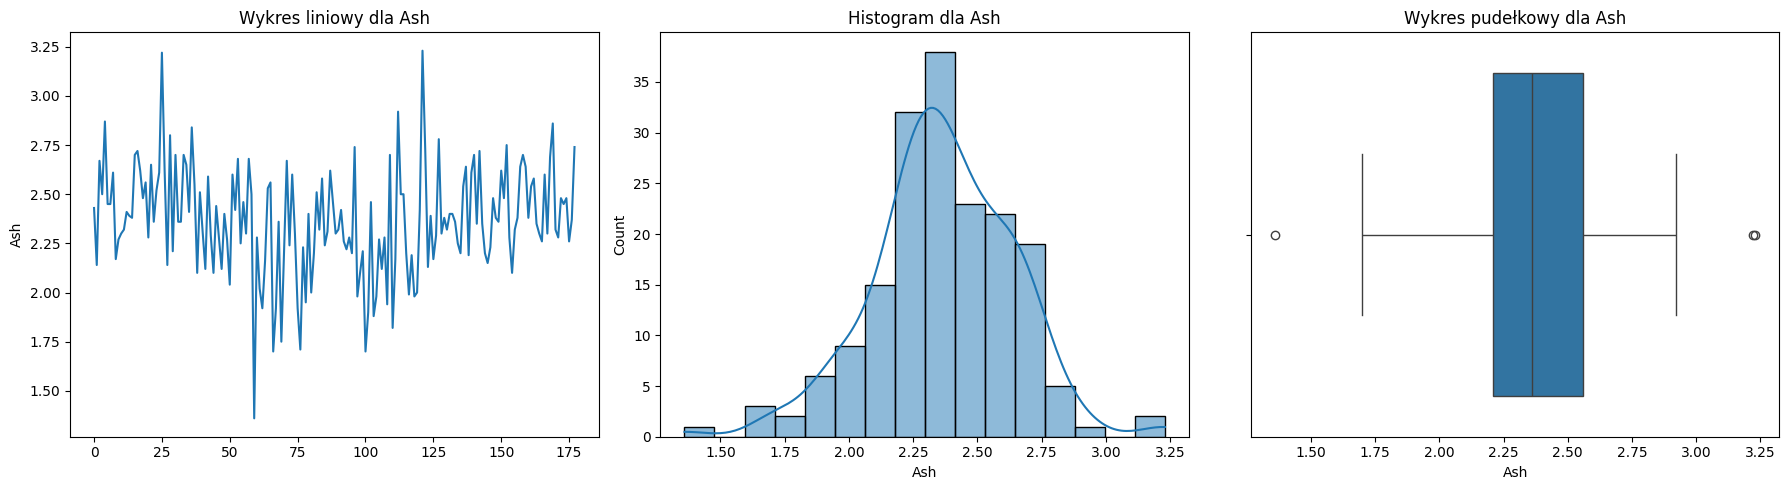

In [10]:
# 6. Zrobić wykresy dla trzech wybranych zmiennych (tam gdzie się da wykres liniowy, histogram, pudełkowy) 20 pkt

# Lista wybranych zmiennych ( z poprzedniego zadania, ale zostawiam jakby trzeba bylo zmienic )
selected_variables = ['Alcohol', 'Malic acid', 'Ash']

# Tworzenie wykresów dla każdej wybranej zmiennej ( uzywamy petli, zeby uniknac kopiowania kodu )
for var in selected_variables:
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    # Wykres liniowy
    sns.lineplot(data=wine_data[var], ax=ax[0])
    ax[0].set_title(f'Wykres liniowy dla {var}')
    
    # Histogram
    sns.histplot(wine_data[var], kde=True, ax=ax[1])
    ax[1].set_title(f'Histogram dla {var}')
    
    # Wykres pudełkowy
    sns.boxplot(x=wine_data[var], ax=ax[2])
    ax[2].set_title(f'Wykres pudełkowy dla {var}')
    
    plt.tight_layout()
    plt.show()